**Name - NIM**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

In [45]:
url = "https://raw.githubusercontent.com/tfilushandy/DATASET-DM-W7---BANK/refs/heads/main/bank.csv"
df = pd.read_csv(url, sep=';')
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3676,47,services,married,secondary,no,2322,no,no,cellular,22,aug,618,1,-1,0,unknown,no
1903,60,retired,married,secondary,no,197,no,no,cellular,7,oct,1386,1,-1,0,unknown,no
2562,46,admin.,divorced,secondary,no,7378,no,no,cellular,18,nov,466,1,-1,0,unknown,no
3791,56,services,married,secondary,no,22196,yes,no,cellular,21,nov,189,1,-1,0,unknown,no
4301,49,blue-collar,married,primary,no,371,yes,no,cellular,31,jul,18,44,-1,0,unknown,no
2328,25,blue-collar,single,secondary,no,913,yes,no,cellular,7,jul,113,4,-1,0,unknown,no
3471,46,blue-collar,married,primary,no,1291,yes,no,cellular,14,may,142,3,259,17,failure,no
4269,45,blue-collar,married,primary,no,185,yes,no,cellular,29,jan,249,3,-1,0,unknown,no
964,53,management,divorced,primary,no,255,no,no,cellular,19,nov,126,1,-1,0,unknown,no
1611,46,management,divorced,tertiary,no,1297,no,no,cellular,11,aug,716,3,-1,0,unknown,yes


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [47]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [48]:
col_names = ['job', 'poutcome','contact', 'education' ,'marital']
for col in col_names:
  print(df[col].value_counts(dropna=False))

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64
poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtype: int64
contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64


In [49]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [50]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].replace('unknown', np.nan)

In [51]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,NaN,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,NaN,3,jun,199,4,-1,0,NaN,no
4,59,blue-collar,married,secondary,no,0,yes,no,NaN,5,may,226,1,-1,0,NaN,no


In [52]:
for col in ['job', 'education' , 'contact' , 'poutcome']:
  df[col] = df[col].fillna(df[col].mode()[0])

In [53]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,failure,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,cellular,3,jun,199,4,-1,0,failure,no
4,59,blue-collar,married,secondary,no,0,yes,no,cellular,5,may,226,1,-1,0,failure,no


In [54]:
df['job'].replace('admin.', 'management', inplace=True)
df.sample(n=10)

<ipython-input-54-aa4b23da13d6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job'].replace('admin.', 'management', inplace=True)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2727,27,blue-collar,single,primary,no,-179,yes,no,cellular,15,may,54,2,-1,0,failure,no
3186,41,management,married,tertiary,no,4824,no,yes,cellular,18,jul,168,7,-1,0,failure,no
3631,55,retired,married,secondary,no,4194,no,yes,telephone,30,jul,208,3,-1,0,failure,no
3246,33,blue-collar,married,secondary,no,-241,yes,yes,cellular,27,may,169,1,-1,0,failure,no
3060,52,management,married,secondary,no,0,no,no,cellular,22,apr,91,2,275,1,failure,no
3929,54,housemaid,married,secondary,no,0,no,no,cellular,14,apr,94,5,145,3,other,no
2958,31,services,married,tertiary,no,309,yes,yes,cellular,7,may,294,1,-1,0,failure,no
205,45,technician,single,tertiary,no,0,yes,no,cellular,18,nov,139,2,-1,0,failure,no
2479,34,technician,married,secondary,no,-136,yes,yes,cellular,12,aug,131,2,-1,0,failure,no
1326,51,services,married,secondary,no,5801,yes,no,cellular,29,may,147,2,-1,0,failure,no


In [55]:
col_names = ['job']
for col in col_names:
  print(df[col].value_counts(dropna=False))

job
management       1485
blue-collar       946
technician        768
services          417
retired           230
self-employed     183
entrepreneur      168
unemployed        128
housemaid         112
student            84
Name: count, dtype: int64


# **VISUALISASI**

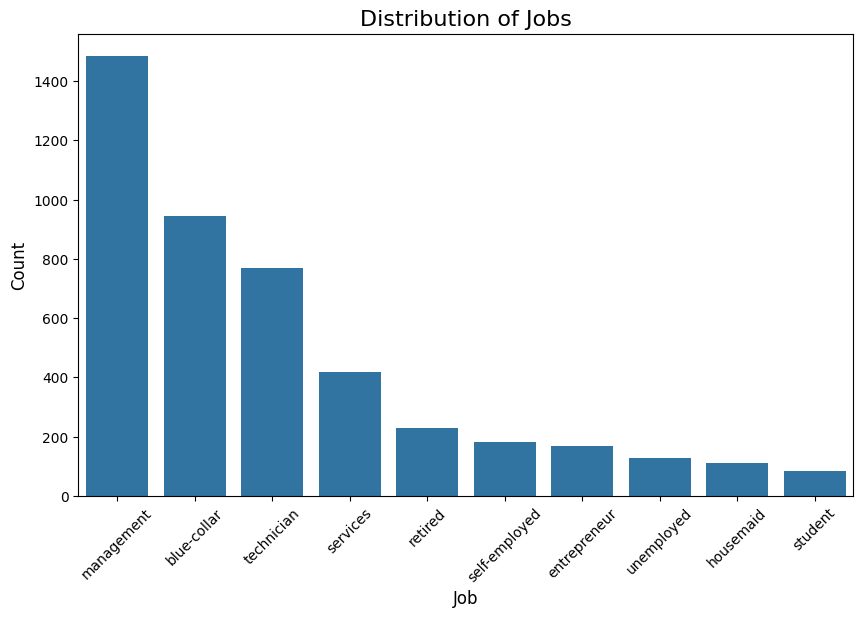

In [56]:
# Mengatur ukuran grafik
plt.figure(figsize=(10,6))

# Membuat countplot untuk kolom 'job'
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Jobs', fontsize=16)
plt.xlabel('Job', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Menampilkan grafik
plt.xticks(rotation=45)  # Memutar label x agar lebih mudah dibaca
plt.show()

Melihat Pembagian Job berdasarkan jumlah tiap role pekerjaannya

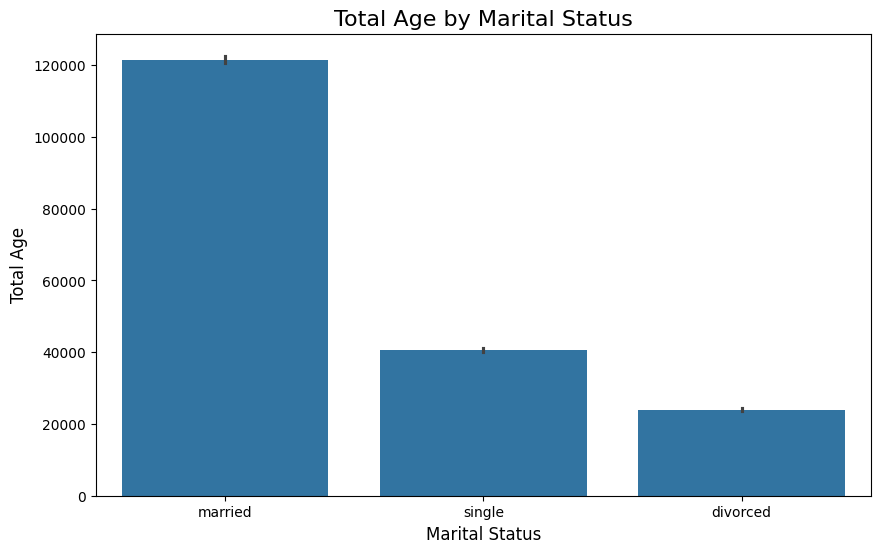

In [59]:
# Mengatur ukuran grafik
plt.figure(figsize=(10,6))

# Membuat barplot untuk melihat rata-rata umur per status perkawinan
sns.barplot(data=df, x='marital', y='age', estimator=sum)

# Menambahkan judul dan label sumbu
plt.title('Total Age by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Total Age', fontsize=12)

# Menampilkan grafik
plt.show()

Grafik batang (bar plot) ini akan menunjukkan total nilai usia (age) untuk setiap status perkawinan (marital) yang ada di dataset. Setiap batang mewakili total umur dari orang-orang yang berada dalam kategori marital tertentu. Misalnya, akan ada satu batang untuk single, satu untuk married, dan satu untuk divorced (atau status lain yang mungkin ada).

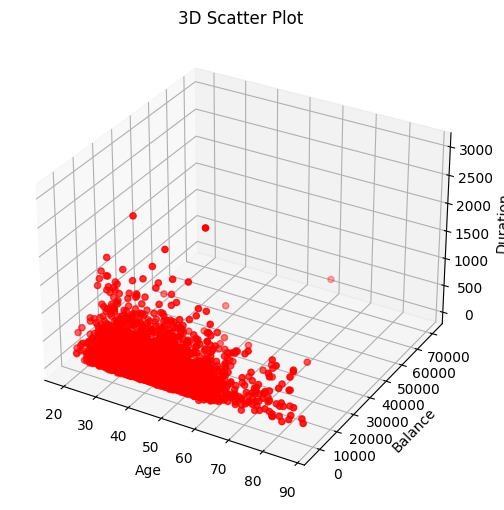

In [63]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Visualisasi 3D antara age, balance, dan duration
ax.scatter(df['age'], df['balance'], df['duration'], c='r', marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Balance')
ax.set_zlabel('Duration')

plt.title('3D Scatter Plot')
plt.show()

melihat hubungan antara tiga variabel sekaligus, menggunakan scatter plot 3D.

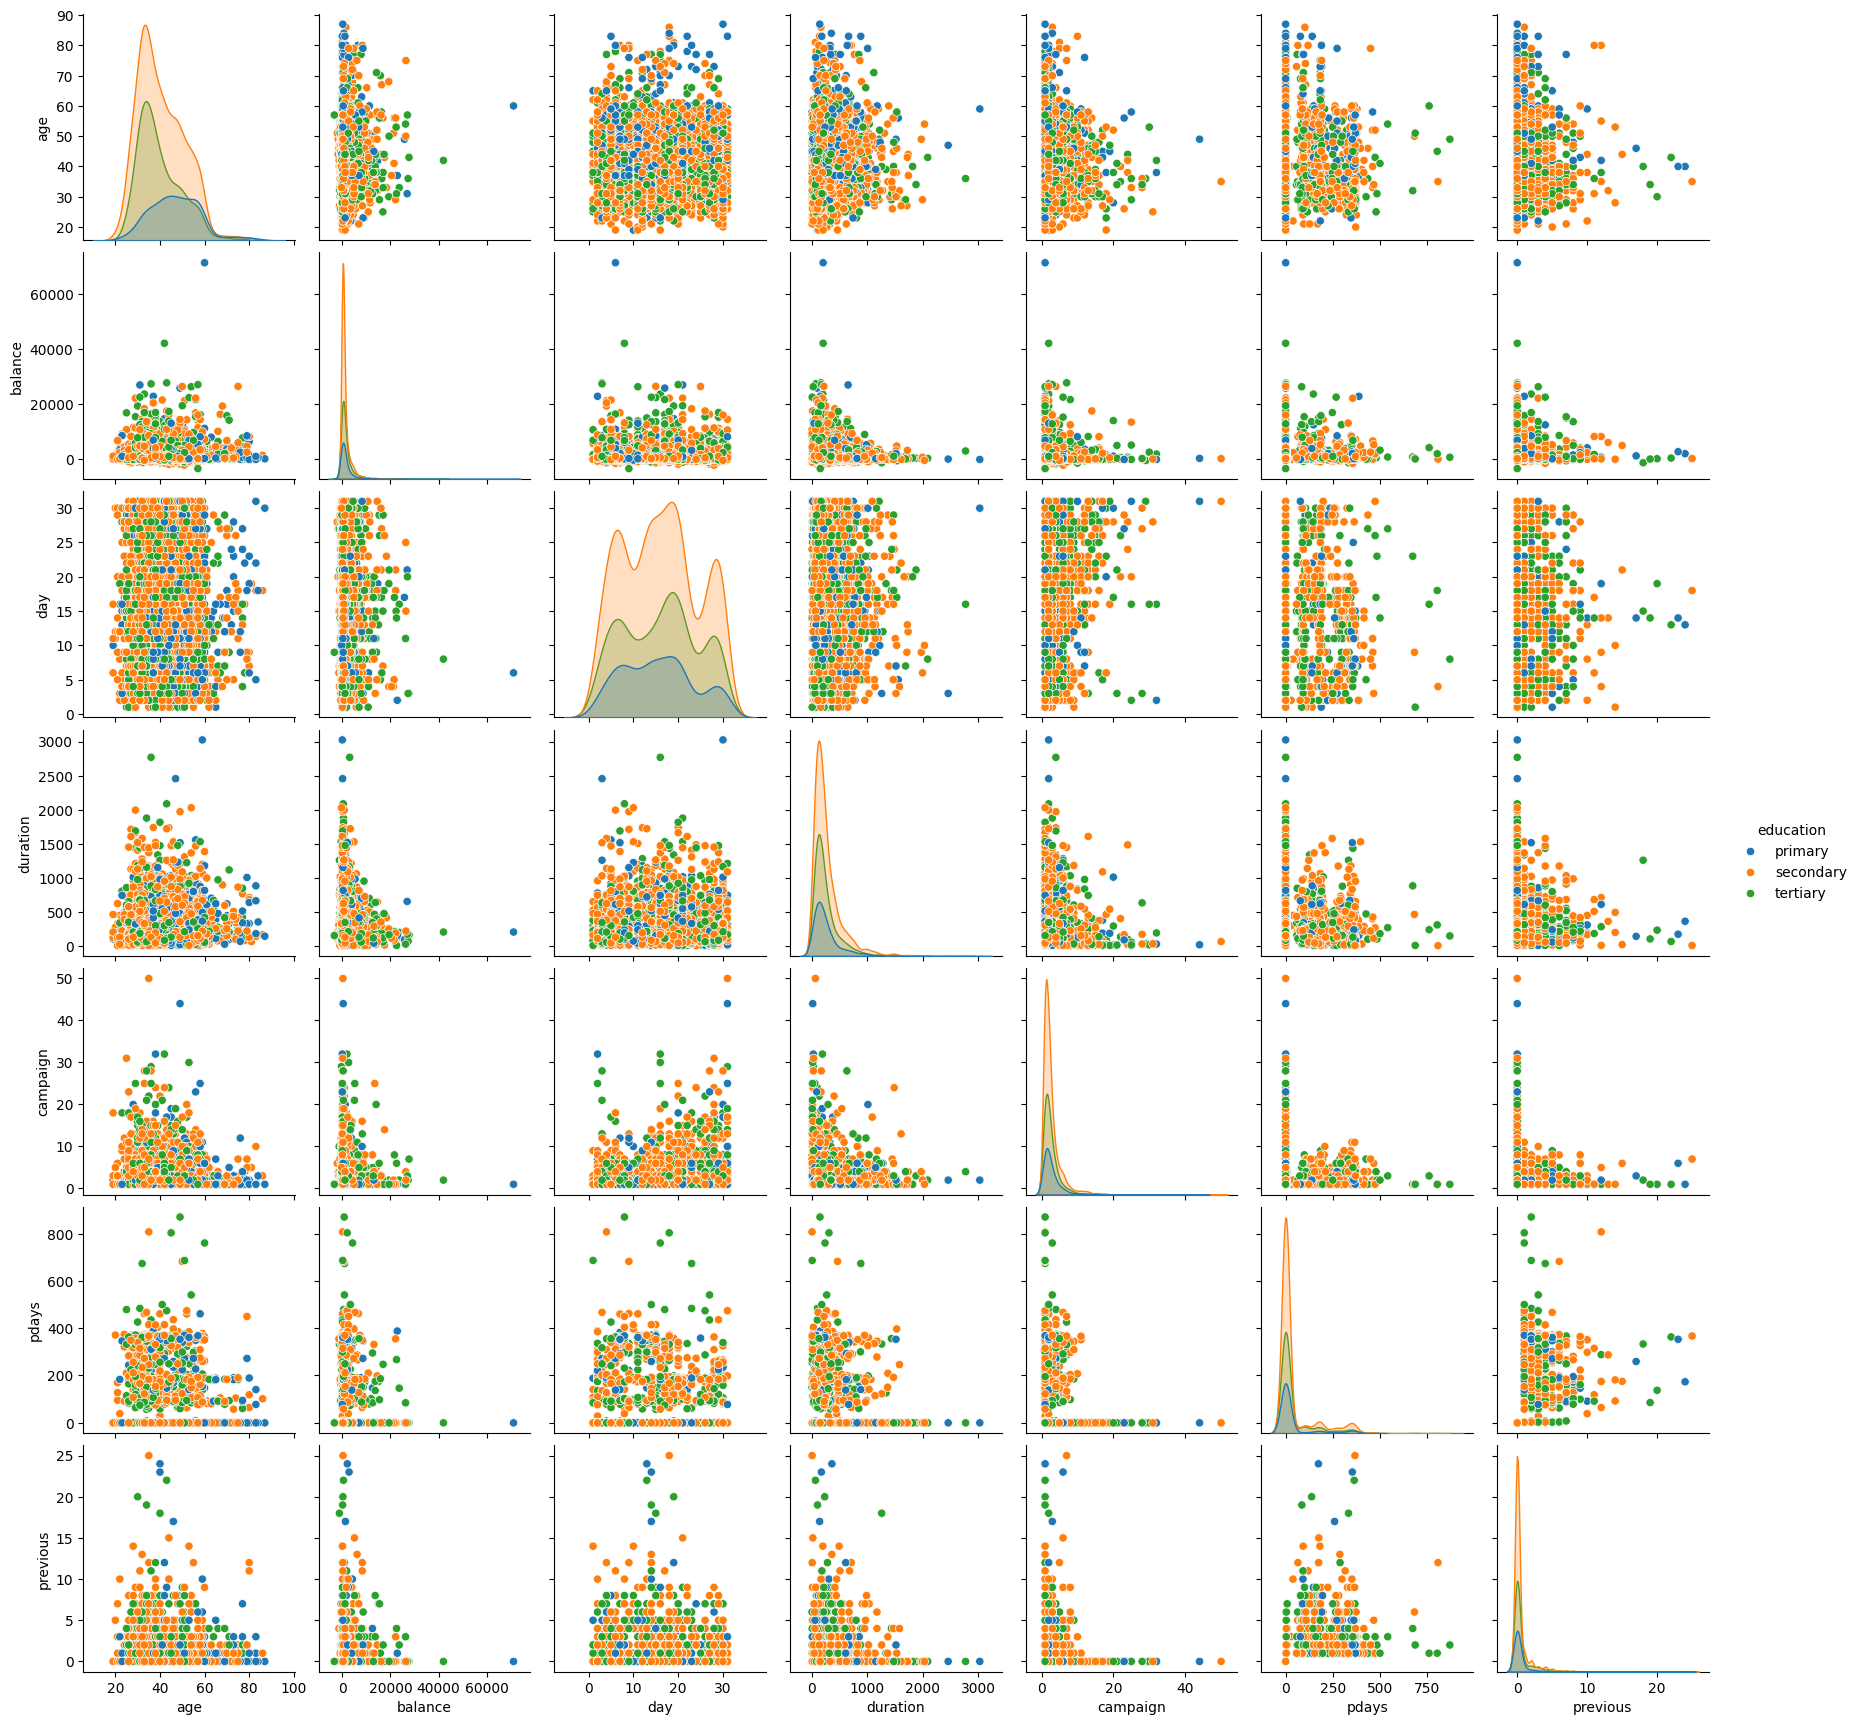

In [62]:
sns.pairplot(df, hue='education')

visualisasi ini membantu kita memahami pola-pola dan korelasi antara variabel-variabel numerik serta membandingkan distribusi variabel berdasarkan tingkat pendidikan dalam data.

In [64]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,failure,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,cellular,3,jun,199,4,-1,0,failure,no
4,59,blue-collar,married,secondary,no,0,yes,no,cellular,5,may,226,1,-1,0,failure,no


In [65]:
le = LabelEncoder()
for col in ['job', 'marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']:
  df[col] = le.fit_transform(df[col])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,9,1,0,0,1787,0,0,0,19,10,79,1,-1,0,0,0
1,33,6,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,3,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,3,1,2,0,1476,1,1,0,3,6,199,4,-1,0,0,0
4,59,0,1,1,0,0,1,0,0,5,8,226,1,-1,0,0,0


<Axes: >

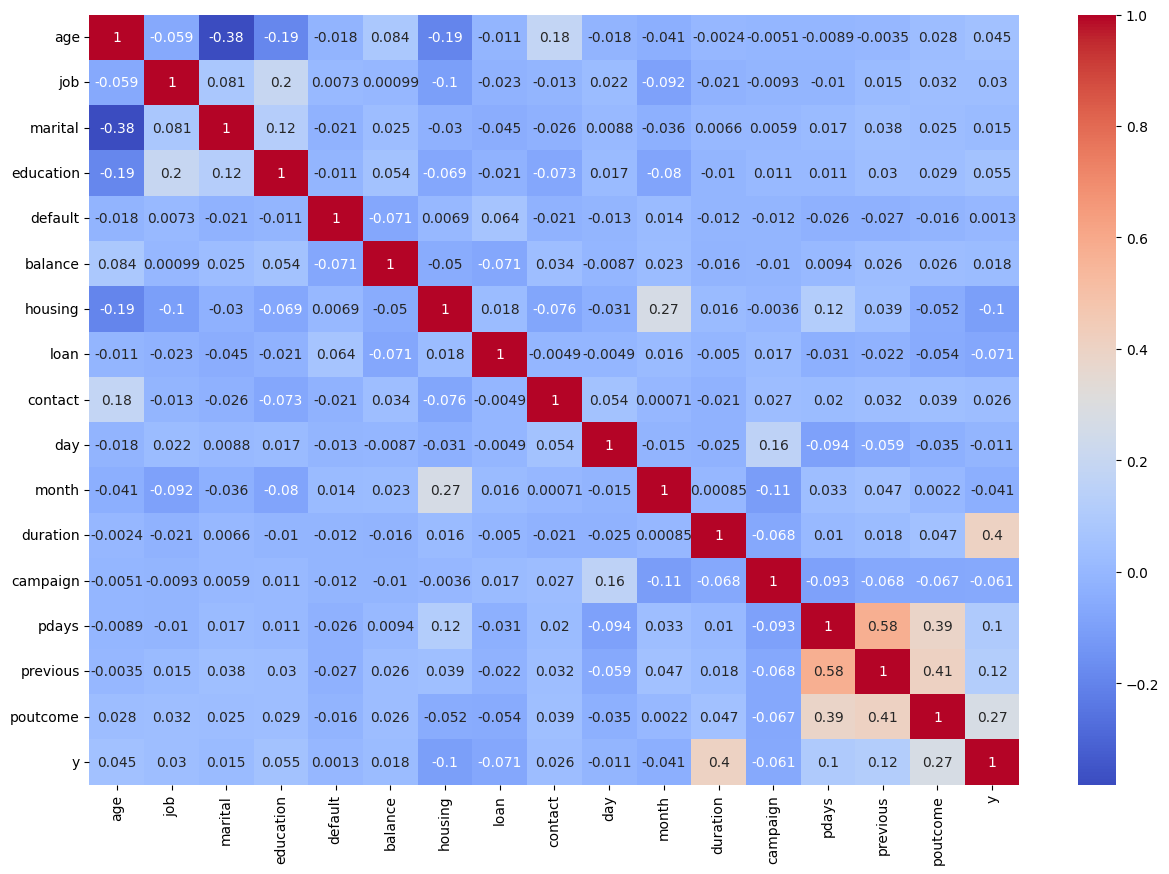

In [87]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

## Machine Learning

In [71]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('y', axis=1)  # Drop kolom target 'y' dari fitur
y = df['y']  # Simpan kolom target di y

In [72]:
# Melakukan split pada dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
X_train.shape, X_test.shape

((3616, 16), (905, 16))

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
# b. Predict the test set results
y_pred = rf_clf.predict(X_test)

In [76]:
# c. Check accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.91


In [77]:
# d. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[788  19]
 [ 66  32]]


In [78]:
# e. Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.63      0.33      0.43        98

    accuracy                           0.91       905
   macro avg       0.78      0.65      0.69       905
weighted avg       0.89      0.91      0.89       905



In [79]:
# f. Results and conclusion
print("Results and Conclusion:")
if accuracy > 0.8:
    print("The model performs well with an accuracy greater than 80%.")
else:
    print("The model could be improved, as the accuracy is below 80%. Consider tuning the model parameters or using more data.")

Results and Conclusion:
The model performs well with an accuracy greater than 80%.


## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42, max_features=4)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_features=4, random_state=42)

In [81]:
# b. Predict the test set results
y_pred = gb_clf.predict(X_test)

In [82]:
# c. Check accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


In [83]:
# d. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[784  23]
 [ 71  27]]


In [84]:
# e. Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.54      0.28      0.36        98

    accuracy                           0.90       905
   macro avg       0.73      0.62      0.65       905
weighted avg       0.88      0.90      0.88       905



In [85]:
# f. Results and conclusion
print("Results and Conclusion:")
if accuracy > 0.8:
    print("The model performs well with an accuracy greater than 80%.")
else:
    print("The model could be improved, as the accuracy is below 80%. Consider tuning the model parameters or using more data.")

Results and Conclusion:
The model performs well with an accuracy greater than 80%.
